# Enterprise Data Science_COVID-19

### Author: Akanksha Parashar
### Matrikelnummer: 423022

## Notebook Description
- This notebook contains the dataset with doubling rate of every two days, four days and ten days. 
- After applying the polynomial regression, we have calculated 'Mean Absolute Percentage Error' i.e. MAPE.
- Finally, we plotted MAPE train and MAPE test with different degree polynomial.
- The dataset of the COVID-19 is taken from John Hopkins COVID-19 GitHub page.
- The datapath given in this notebook is of user's computer folder where the required csv files are saved.
- The data source is given in the Readme file.

In [140]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [141]:
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16,10)
pd.set_option('display.max_rows',500)
import plotly.graph_objects as go

# Data Load

In [142]:
# try to parse the dates right at the beginning
# it works out of the box if the date was stored ISO YYYY-MM-DD format

df_analyse = pd.read_csv('C:\\Users\\hp\\Documents\\Covid-19-master\\COVID-19-master\\COVID-19-master\\csse_covid_19_data\\csse_covid_19_time_series\\Processed\\pd_sync_timelines_w_slope.csv', sep = ';')
df_analyse.head()

,Unnamed: 0,doubling every two days,doubling every four days,doubling every ten days,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe,Dates
0,0,100.000000,100.000000,100.000000,106.0,104.0,139.0,113.0,113.0,NaN,...,104.0,102.0,107.0,113.0,109.0,106.0,106.0,106.0,132.0,0
1,1,141.421356,118.920712,107.177346,114.0,123.0,201.0,133.0,118.0,NaN,...,144.0,164.0,107.0,123.0,116.0,129.0,122.0,109.0,149.0,1
2,2,200.000000,141.421356,114.869835,114.0,146.0,230.0,164.0,130.0,NaN,...,149.0,207.0,119.0,134.0,119.0,141.0,128.0,119.0,149.0,2
3,3,282.842712,168.179283,123.114441,166.0,174.0,264.0,188.0,138.0,NaN,...,172.0,207.0,119.0,141.0,134.0,177.0,130.0,124.0,174.0,3
4,4,400.000000,200.000000,131.950791,192.0,186.0,302.0,224.0,140.0,NaN,...,181.0,259.0,135.0,153.0,161.0,211.0,167.0,137.0,178.0,4


In [143]:
df_analyse.columns.get_loc('Dates')

202

In [144]:
df_analyse = df_analyse.drop(['Unnamed: 0'],axis = 1)
df_analyse.head()

,doubling every two days,doubling every four days,doubling every ten days,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe,Dates
0,100.000000,100.000000,100.000000,106.0,104.0,139.0,113.0,113.0,NaN,101.0,...,104.0,102.0,107.0,113.0,109.0,106.0,106.0,106.0,132.0,0
1,141.421356,118.920712,107.177346,114.0,123.0,201.0,133.0,118.0,NaN,101.0,...,144.0,164.0,107.0,123.0,116.0,129.0,122.0,109.0,149.0,1
2,200.000000,141.421356,114.869835,114.0,146.0,230.0,164.0,130.0,NaN,101.0,...,149.0,207.0,119.0,134.0,119.0,141.0,128.0,119.0,149.0,2
3,282.842712,168.179283,123.114441,166.0,174.0,264.0,188.0,138.0,NaN,101.0,...,172.0,207.0,119.0,141.0,134.0,177.0,130.0,124.0,174.0,3
4,400.000000,200.000000,131.950791,192.0,186.0,302.0,224.0,140.0,NaN,101.0,...,181.0,259.0,135.0,153.0,161.0,211.0,167.0,137.0,178.0,4


In [145]:
df_analyse.sort_values('Dates',ascending = True).head()

,doubling every two days,doubling every four days,doubling every ten days,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe,Dates
0,100.000000,100.000000,100.000000,106.0,104.0,139.0,113.0,113.0,NaN,101.0,...,104.0,102.0,107.0,113.0,109.0,106.0,106.0,106.0,132.0,0
1,141.421356,118.920712,107.177346,114.0,123.0,201.0,133.0,118.0,NaN,101.0,...,144.0,164.0,107.0,123.0,116.0,129.0,122.0,109.0,149.0,1
2,200.000000,141.421356,114.869835,114.0,146.0,230.0,164.0,130.0,NaN,101.0,...,149.0,207.0,119.0,134.0,119.0,141.0,128.0,119.0,149.0,2
3,282.842712,168.179283,123.114441,166.0,174.0,264.0,188.0,138.0,NaN,101.0,...,172.0,207.0,119.0,141.0,134.0,177.0,130.0,124.0,174.0,3
4,400.000000,200.000000,131.950791,192.0,186.0,302.0,224.0,140.0,NaN,101.0,...,181.0,259.0,135.0,153.0,161.0,211.0,167.0,137.0,178.0,4


In [146]:
df_analyse.dtypes

doubling every two days             float64
doubling every four days            float64
doubling every ten days             float64
Afghanistan                         float64
Albania                             float64
Algeria                             float64
Andorra                             float64
Angola                              float64
Antarctica                          float64
Antigua and Barbuda                 float64
Argentina                           float64
Armenia                             float64
Australia                           float64
Austria                             float64
Azerbaijan                          float64
Bahamas                             float64
Bahrain                             float64
Bangladesh                          float64
Barbados                            float64
Belarus                             float64
Belgium                             float64
Belize                              float64
Benin                           

In [147]:
df_analyse.columns.get_loc('Germany')

70

In [148]:
country_list = df_analyse.columns[1:]

# Helper functions

In [149]:
def quick_plot(x_in, df_input, y_scale = 'log', slider = False):
    
    " " " Quick basic plot for quick static evaluation of a time series\
          you can push selective columns of your dataframe by .iloc[:, [0,6,7,8]]\
          Parameters:\
          -----------\
          x_in : array\
          array of datetime object, or array of numbers\
          df_input : pandas dataframe\
            the plotting matrix where each column is plotted\
            the name of the column will be used for the legend\
          scale : str\
            y-axis scale as 'log' or 'linear'\
          slider : bool\
            TRUE or FALSE for x-axis slider\
          Returns:\
          ----------" " "
    fig = go.Figure()
    for each in df_input.columns:
        fig.add_trace(go.Scatter(x = x_in, y = df_input[each], name = each, opacity = 0.8))
        
    fig.update_layout(autosize = True, width = 1024, height = 768, font = dict(family = "PT Sans, monospace", size = 18, color = "#7f7f7f"))
    
    fig.update_yaxes(type = 'log') # range = [ 0.1,2]
    fig.update_xaxes(tickangle = -45, nticks = 20, tickfont = dict(size = 14, color = '#7f7f7f'))
    
    if slider == True:
        fig.update_layout(xaxis_rangeslider_visible = True)
    fig.show()

In [150]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [151]:
quick_plot(df_analyse.Dates, df_analyse.iloc[:, 70 : 76], y_scale = 'log', slider = True)

# Fitting a polynomial curve
-I highly recommendsection: Hyperparameter and Model Validation from Jake VanderPlas
-This function is from the Python Data Science Handbook by Jake VanderPlas; the content is available on GitHub.

https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py

In [152]:
# check that all data is there
df_poly_check = df_analyse.iloc[:,70:76].reset_index()
df_poly_check.head()

,index,Germany,Ghana,Greece,Grenada,Guatemala,Guinea
0,0,117.0,132.0,190.0,103.0,126.0,111.0
1,1,150.0,137.0,228.0,103.0,137.0,121.0
2,2,188.0,141.0,331.0,103.0,155.0,128.0
3,3,240.0,152.0,331.0,105.0,156.0,144.0
4,4,349.0,152.0,387.0,105.0,167.0,164.0


In [153]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))
''' We use feature transformation i.e. PolynomialFeatures. It transforms and it is called as fit transform method, 
its not a predictor, it is a fit transformer means it transform the input data to an output data. PolynomialFeatures transformer
of Scikt learn gives you different possible combination of polynomial. Then, we do LinearRegression on these possibilities of
polynomials in the next run. There is a wonderful command in Scikt learn if everythind designed according to scikt learn standard
such as fit, fit transform, predict. You can do this in a pipeline way. Pipeline means doing polynomialfeature transformation 
first then if you would like to include several commands you can run them and finally perform linearregression on it.'''

''' The example here what we are using is working with the one dimensional input and one dimensional target. This is how example
in the 'polynomial interpolation image' is defined. and this example works with the one dimensional input and one dimensional
target. So, we are fitting the one dimensional thing. fitting one dimensional vector gives us many good ways how to do it in a 
visual representation manner. It is very tricky to do it on many dimensions.'''

" The example here what we are using is working with the one dimensional input and one dimensional target. This is how example\nin the 'polynomial interpolation image' is defined. and this example works with the one dimensional input and one dimensional\ntarget. So, we are fitting the one dimensional thing. fitting one dimensional vector gives us many good ways how to do it in a \nvisual representation manner. It is very tricky to do it on many dimensions."

In [154]:
y = df_poly_check[['Germany','Ghana','Greece','Grenada']]# these four are stacked into one column now with list within list
y

,Germany,Ghana,Greece,Grenada
0,117.0,132.0,190.0,103.0
1,150.0,137.0,228.0,103.0
2,188.0,141.0,331.0,103.0
3,240.0,152.0,331.0,105.0
4,349.0,152.0,387.0,105.0
...,...,...,...,...
836,NaN,NaN,NaN,NaN
837,NaN,NaN,NaN,NaN
838,NaN,NaN,NaN,NaN
839,NaN,NaN,NaN,NaN


In [155]:
y = df_poly_check[['Germany','Ghana','Greece','Grenada']].unstack()
# now it will show 0 to 840 values of Germany and then Ghana and so on
y

Germany  0      117.0
         1      150.0
         2      188.0
         3      240.0
         4      349.0
                ...  
Grenada  836      NaN
         837      NaN
         838      NaN
         839      NaN
         840      NaN
Length: 3364, dtype: float64

In [156]:
y = df_poly_check[['Germany','Ghana','Greece','Grenada']].unstack().sort_index(axis = 0, level = 1)
# now it will show show values of index 0 together then of 1 together and so on
# https://betterprogramming.pub/sorting-a-python-pandas-dataframes-by-index-and-value-7306ac754014
# you the above link to study .sort function in a better way
# level= 0, it will sort on the basis of countries like dictionary letters which will come first its data will be shown first
# level=1 it will sort on the values from 0 to 840 and bring all zeroes of all countries together and so on
y

Germany  0      117.0
Ghana    0      132.0
Greece   0      190.0
Grenada  0      103.0
Germany  1      150.0
                ...  
Grenada  839      NaN
Germany  840      NaN
Ghana    840      NaN
Greece   840      NaN
Grenada  840      NaN
Length: 3364, dtype: float64

In [157]:
y = pd.DataFrame(y)
y

,,0
Germany,0,117.0
Ghana,0,132.0
Greece,0,190.0
Grenada,0,103.0
Germany,1,150.0
...,...,...
Grenada,839,NaN
Germany,840,NaN
Ghana,840,NaN
Greece,840,NaN


In [158]:
y.columns =['value']
y

,,value
Germany,0,117.0
Ghana,0,132.0
Greece,0,190.0
Grenada,0,103.0
Germany,1,150.0
...,...,...
Grenada,839,NaN
Germany,840,NaN
Ghana,840,NaN
Greece,840,NaN


In [159]:
y["value"].fillna(value = 0.001, inplace = True)

In [160]:
y.isnull()

,,value
Germany,0,False
Ghana,0,False
Greece,0,False
Grenada,0,False
Germany,1,False
...,...,...
Grenada,839,False
Germany,840,False
Ghana,840,False
Greece,840,False


In [161]:
y_reference = y.to_csv('C:\\Users\\hp\\Documents\\Covid-19-master\\COVID-19-master\\COVID-19-master\\csse_covid_19_data\\csse_covid_19_time_series\\Processed\\y_reference.csv', sep = ';')

In [162]:
# Now we will split our dataset into test dataset and train dataset

In [163]:
test_points = 1700
y_train = y[0:-test_points-1] # train dataset where we train our model on
y_test = y[-test_points:] # test dataset where we check our result

In [164]:
count = (y[0:3364] == 0).sum()
count

value    0
dtype: int64

In [165]:
y.isnull()

,,value
Germany,0,False
Ghana,0,False
Greece,0,False
Grenada,0,False
Germany,1,False
...,...,...
Grenada,839,False
Germany,840,False
Ghana,840,False
Greece,840,False


y_train = y[0:-test_points-1]
y_train

X_train = np.arange(len(y_train))
X_train

X_train = np.arange(len(y_train)).reshape(-1,1)
X_train

X_train = np.arange(len(y_train)).reshape(-1,1)/4.0
X_train

X_test = np.arange(len(y_train))
X_test

X_test = np.arange(len(y_train),len(y_train))
X_test

X_test = np.arange(len(y_train),len(y_train)+test_points)
X_test

X_test = np.arange(len(y_train),len(y_train)+test_points).reshape(-1,1)
X_test

X_test = np.arange(len(y_train),len(y_train)+test_points).reshape(-1,1)/4.0
X_test

In [166]:
X_train = np.arange(len(y_train)).reshape(-1,1)/4.0
X_test = np.arange(len(y_train),len(y_train)+test_points).reshape(-1,1)/4.0

In [167]:
import seaborn
seaborn.set(rc = {'figure.figsize':(16,8)})# plot formatting, prepare for subplot

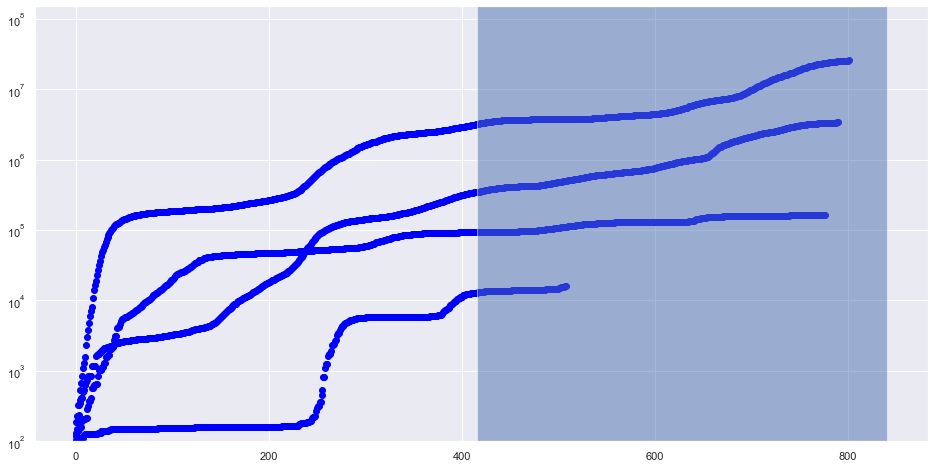

In [168]:
fig, axl = plt.subplots(1,1)

axl.scatter(np.arange(len(y))/4, y, color = 'blue')
axl.axvspan((len(y)-test_points-1)/4, len(y)/4, facecolor = 'b', alpha = 0.5)

axl.set_ylim(100,150000000)
axl.set_yscale('log')

In [169]:
# the light gray side data we have used for training and dark gray side data we have used for prediction

In [170]:
# The Axes.axvspan() function in axes module of matplotlib library is used to add a vertical span (rectangle) across the axis.
# This returns the vertical span (rectangle) from (xmin, ymin) to (xmax, ymax)

In [171]:
from sklearn.metrics import mean_absolute_error

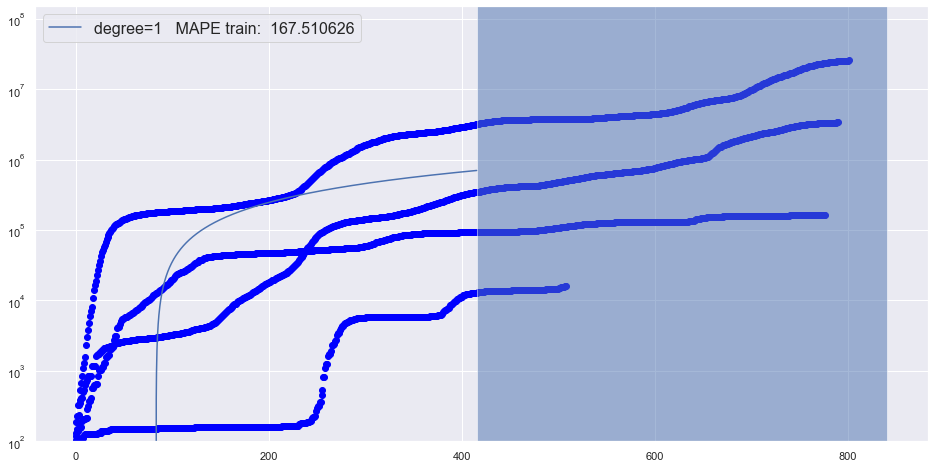

In [172]:

fig, axl = plt.subplots(1,1)

axl.scatter(np.arange(len(y))/4, y, color = 'blue')
axl.axvspan((len(y)-test_points-1)/4, len(y)/4, facecolor = 'b', alpha = 0.5)

degree = 1
y_hat_insaple = PolynomialRegression(degree).fit(X_train, y_train).predict(X_train)
# X-train is the index on the x axis
# y_train is the points in blue colour corresponding to x axis
# insample prediction is the data on the light gray side on which we train and predict
# insample means we are doing check on insample dataset
# hat means predicted variable
axl.plot(X_train, y_hat_insaple, label = 'degree={0}'.format(degree) + '   MAPE train:  ' + str(mean_absolute_percentage_error(y_hat_insaple, y_train))[0:10])
# X_train is the x axis
# y_hat_insaple is the predicted y
# degree = {0} is the polynomial degree
# we have put calculated MSE in string format as we can concatenate two strings
# [0:10] means to show 9 digits in MSE value including decimal
# if you will run the above two commands i.e., y_hat_insaple and axl.plot under for degree in [1,2,3,5] you will get different..
# ...degree curves
axl.set_ylim(100,150000000)
axl.set_yscale('log')
axl.legend(loc = 'best', prop = {'size' : 16}); 
# loc is the location,prop keyword to adjust the legend size
# the semicolon is to avoid the text line which appears before graph

# Mean Absolut Error
In statistics, mean absolute error MAE''' is a measure of Errors between paired observations expressing the same phenomenon.

Comparing examples of ''Y'' (forecasts) versus ''X'' (actual/observe) across time steps MAE is calculated as:

use the link to get further details https://www.statisticshowto.com/absolute-error/

 
 


In [173]:
# The MAE gives us the business perspective and the size of error

# Mean Absolut Percentage Error (MAPE)
mean absolute percentage error (MAPE), also known as mean absolute percentage deviation (MAPD), is a measure of prediction accuracy of a forecasting method in [[statistics]],

for example in trend estimation, also used as a loss function for regression problems in machine learning. It usually expresses the accuracy as a ratio defined by the formula:


In [174]:
# The MAPE gives us the relational percentage

In [175]:
''' The MAPE is little bit usymmetric because we are only normalising on our trues and if the true is zero(xi) its not 
determined what is the value of MAPE. That is why we are taking the average of it to make it symmetric'''

' The MAPE is little bit usymmetric because we are only normalising on our trues and if the true is zero(xi) its not \ndetermined what is the value of MAPE. That is why we are taking the average of it to make it symmetric'

# if the MAPE is 80, on average, the forecast is off by 80%
- the MAPE value should be as low as possible

In [176]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Symmetric mean absolute percentage error
Symmetric mean absolute percentage error (SMAPE''' or '''sMAPE)''' is an accuracy measure based on percentage (or relative) errors. It is usually defined{{Citation needed|reason=S. Makridakis didn't use following definition in his article ''Accuracy measures: theoretical and practical concerns,'' 1993.|date=May 2017}} as follows:

 


# Plotting MAPE train And MAPE test with different degree polynomial

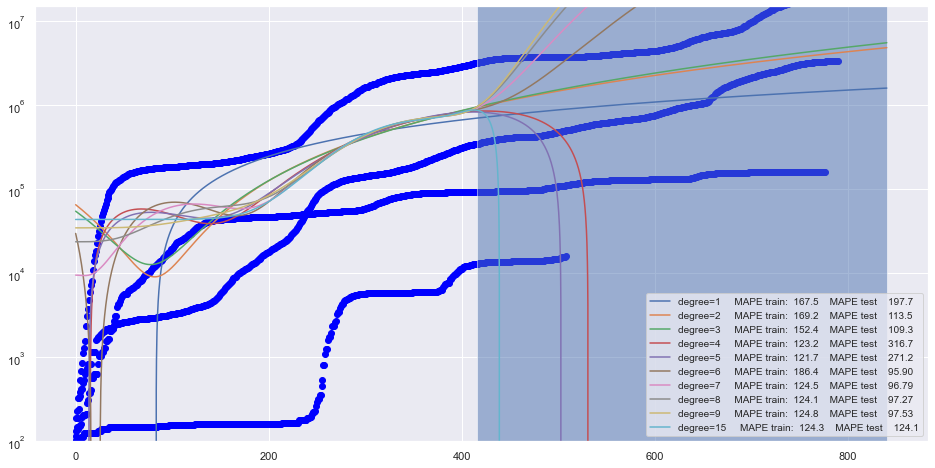

In [177]:
fig, ax1 = plt.subplots(1, 1)

ax1.scatter(np.arange(len(y))/4,y, color='blue')
ax1.axvspan((len(y)-test_points-1)/4, len(y)/4, facecolor='b', alpha=0.5)

for degree in [1,2,3,4,5,6,7,8,9,15]:
    y_hat_insaple=PolynomialRegression(degree).fit(X_train, y_train).predict(X_train)
    y_hat_test = PolynomialRegression(degree).fit(X_train, y_train).predict(X_test)



    X_plot=np.concatenate((X_train, X_test), axis=None)
    y_plot=np.concatenate((y_hat_insaple, y_hat_test), axis=None)

    ax1.plot(X_plot, y_plot, label='degree={0}'.format(degree)+ 
                 '     MAPE train:  ' + str(mean_absolute_percentage_error(y_hat_insaple, y_train))[0:5]
                 +'    MAPE test    ' +str(mean_absolute_percentage_error(y_hat_test, y_test))[0:5]) 

ax1.set_ylim(100, 15000000)
ax1.set_yscale('log')
ax1.legend(loc='best',prop={'size': 10});

# MAPE test was showing NAN values
so we filled all the missing values with 0.01 after creating dataframe of y